Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

---

Please **submit this Jupyter notebook through Canvas** no later than **November 30, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
In the box below, write down the names + student ID of the people in your group.

MeifangLi_13043390
YuhaoQian_13011456

# The global keyword (helpful info for exercise 3)
In exercise 3 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

## (a) (exercise 6.4(b)) 1 point

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.


YOUR ANSWER HERE

Our handwritten answer is submitted in a pdf.

## (b) (exercise 6.4(c)) 1 point

Minimize $x+y+3$ under the constraint that $x^2 + x +y^2+y = 4$. Prove that the point you find is a minimum.

YOUR ANSWER HERE

Our handwritten answer is submitted in a pdf.

---
# Exercise 2

## (a) 1 point
 The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

YOUR ANSWER HERE

Our handwritten answer is submitted in a pdf.

## (b) 2 points
Implement the method of steepest descent. Use ``scipy.optimize.line_search`` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum.


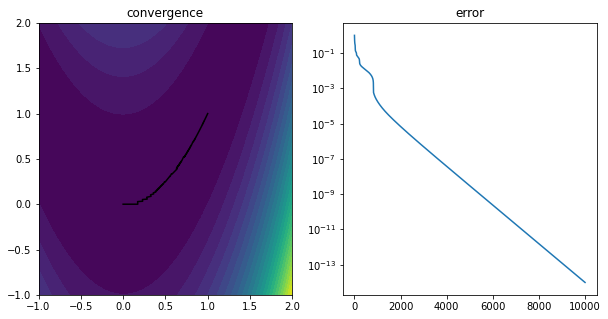

In [2]:
# python code here
def rosenbrock(x):
    # YOUR CODE HERE
    return 100*((x[1]-(x[0]**2))**2)+(1-x[0])**2

def gradf(x):
    # YOUR CODE HERE
    x1=400*np.power(x[0],3)-400*x[0]*x[1]+2*x[0]-2
    x2=-200*(x[0]**2)+200*x[1]
    return np.array([x1,x2])


x = np.array([0,0])
x_vals = [np.array([0,0])]
# Do method of steepest descent, converge to [1,1]
for i in range(10000):
    result=scipy.optimize.line_search(rosenbrock,gradf,x,-gradf(x))
    alpha=result[0]
    x_vals.append(x+alpha* (-gradf(x)))
    x=x+alpha*(-gradf(x))

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
X, Y = np.linspace(-1, 2, 101), np.linspace(-1,2, 101)
xx, yy = np.meshgrid(X, Y)
ff = np.zeros(xx.shape)
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        ff[j,i] = rosenbrock((x,y))
ax0.contourf(xx,yy,ff, levels=25, cmap='viridis')
ax0.plot([x[0] for x in x_vals], [x[1] for x in x_vals], 'k-')
ax0.set_title("convergence")
ax1.semilogy([np.abs(rosenbrock((x,y))) for (x,y) in x_vals])
ax1.set_title("error")
plt.show()


----
# Exercise 3

## (a) 2 points

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [3]:
# YOUR CODE HERE

def f(x):
    return 0.5*(x[0]**2)+2.5*(x[1]**2)

def grad_f(x):
    return np.array([x[0],5*x[1]])

x_k=np.array([5,1])
B_k=np.identity(2)

for i in range(5):
    sk = np.linalg.solve(B_k, -grad_f(x_k))
    x_k_1=x_k+sk
    yk=grad_f(x_k_1)-grad_f(x_k)
    front=np.outer(yk,yk.T)/np.dot(yk.T,sk)
    back=np.dot(np.outer(np.dot(B_k,sk),sk.T),B_k)/np.dot(np.dot(sk.T,B_k),sk)
    B_k_1=B_k+front-back
    B_k=B_k_1
    x_k=x_k_1
    print("k:",str(i+1),
        "xk:",x_k,
     "f(xk):",f(x_k),
     "gradient:",grad_f(x_k))

k: 1 xk: [ 0. -4.] f(xk): 40.0 gradient: [  0. -20.]
k: 2 xk: [-2.22222222  0.44444444] f(xk): 2.9629629629629637 gradient: [-2.22222222  2.22222222]
k: 3 xk: [0.81632653 0.08163265] f(xk): 0.34985422740524746 gradient: [0.81632653 0.40816327]
k: 4 xk: [-0.00915314 -0.01533152] f(xk): 0.0006295284307446703 gradient: [-0.00915314 -0.07665758]
k: 5 xk: [-0.00054233  0.00092339] f(xk): 2.2787013239316517e-06 gradient: [-0.00054233  0.00461697]


## (b) 2 points

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

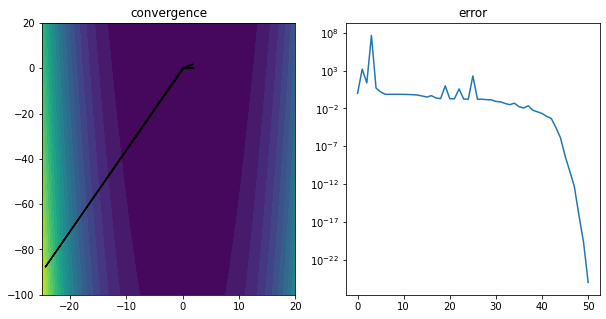

In [4]:
# YOUR CODE HERE
x_k=np.array([0,0])
B_k=np.identity(2)
x_vals = [np.array([0,0])]

for i in range(50):
    sk = np.linalg.solve(B_k, -gradf(x_k))
    x_k_1=x_k+sk
    yk=gradf(x_k_1)-gradf(x_k)
    front=np.outer(yk,yk.T)/np.dot(yk.T,sk)
    back=np.dot(np.outer(np.dot(B_k,sk),sk.T),B_k)/np.dot(np.dot(sk.T,B_k),sk)
    B_k_1=B_k+front-back
    B_k=B_k_1
    x_k=x_k_1
    x_vals.append(x_k)
#     print("k:",str(i+1),
#         "xk:",x_k,
#      "f(xk):",rosenbrock(x_k),
#      "gradient:",gradf(x_k))

#print(x_vals)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
X, Y = np.linspace(-25, 20, 101), np.linspace(-100,20, 101)
xx, yy = np.meshgrid(X, Y)
ff = np.zeros(xx.shape)
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        ff[j,i] = rosenbrock((x,y))
ax0.contourf(xx,yy,ff, levels=25, cmap='viridis')
ax0.plot([x[0] for x in x_vals], [x[1] for x in x_vals], 'k-')
ax0.set_title("convergence")
ax1.semilogy([np.abs(rosenbrock((x,y))) for (x,y) in x_vals])
ax1.set_title("error")
plt.show()

## (c) 1 point
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.


In [5]:
# YOUR CODE HERE
from numpy import linalg as la

x_real=np.array([1,1])
x_k=np.array([0,0])
B_k=np.identity(2)

for i in range(50):
    sk = np.linalg.solve(B_k, -gradf(x_k))
    x_k_1=x_k+sk
    if la.norm(x_k_1-x_real,2)>=1e-5:
        yk=gradf(x_k_1)-gradf(x_k)
        front=np.outer(yk,yk.T)/np.dot(yk.T,sk)
        back=np.dot(np.outer(np.dot(B_k,sk),sk.T),B_k)/np.dot(np.dot(sk.T,B_k),sk)
        B_k_1=B_k+front-back
        B_k=B_k_1
        x_k=x_k_1
#         print("k:",str(i+1),
#             "xk:",x_k,
#          "f(xk):",rosenbrock(x_k),
#          "gradient:",gradf(x_k))
    else:
        break
print('BFGS:',i+1)

BFGS: 46


In [6]:
x_real=np.array([1,1])
x = np.array([0,0])
x_vals = [np.array([0,0])]
# Do method of steepest descent
for j in range(10000):
    result=scipy.optimize.line_search(rosenbrock,gradf,x,-gradf(x))
    alpha=result[0]
    x_new=x+alpha* (-gradf(x))
    if la.norm(x_new-x_real,2)>=1e-5:
        x_vals.append(x_new)
        x=x_new
#         print("k:",str(j+1),
#             "xk:",x,
#          "f(xk):",rosenbrock(x),
#          "gradient:",gradf(x))
    else:
        break
print('Gradiant descent:',j+1)

Gradiant descent: 6980


Text part:
The convergence rate for gradient descent is linear and it needs 6980 evaluations to reach stopping criterion. For BFGS, the convergence rate is superlinear and it only needs 46 evaluations. BFGS converges much faster than gradient descent.